In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('enrollment-by-zipcode.csv')
dataset.head(5)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT
0,Fall 2012,96766,Kaua`i Community College,HAWAIIAN,73
1,Fall 2012,96814,Kapi`olani Community College,NaN,19
2,Fall 2012,96792,Leeward Community College,HAWAIIAN,504
3,Fall 2012,96822,Honolulu Community College,NaN,12
4,Fall 2012,96821,Kapi`olani Community College,NaN,43


In [3]:
dataset.isna().any()

SEMESTER                 False
SPRADDR_ZIP_PR            True
IRO_INSTITUTION_DESCL    False
HAWAIIAN_LEGACY           True
ENROLLMENT               False
dtype: bool

In [5]:
def zipcode(zipcode):
   index=str(zipcode).find('-')
   if index == -1:
     return str(zipcode)
   else:
     return str(zipcode)[:index]


dataset = dataset[dataset['SPRADDR_ZIP_PR'].notna()]
dataset['SPRADDR_ZIP_PR'] = dataset['SPRADDR_ZIP_PR'].apply(zipcode)
dataset.head(3)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT
0,Fall 2012,96766,Kaua`i Community College,HAWAIIAN,73
1,Fall 2012,96814,Kapi`olani Community College,NaN,19
2,Fall 2012,96792,Leeward Community College,HAWAIIAN,504


In [6]:
dataset['YEAR'] = dataset['SEMESTER'].apply(lambda x: x[-4:]).astype(int)
dataset.head(5)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,HAWAIIAN_LEGACY,ENROLLMENT,YEAR
0,Fall 2012,96766,Kaua`i Community College,HAWAIIAN,73,2012
1,Fall 2012,96814,Kapi`olani Community College,NaN,19,2012
2,Fall 2012,96792,Leeward Community College,HAWAIIAN,504,2012
3,Fall 2012,96822,Honolulu Community College,NaN,12,2012
4,Fall 2012,96821,Kapi`olani Community College,NaN,43,2012


In [7]:
dataset=dataset.drop('HAWAIIAN_LEGACY',axis=1)
dataset.head(3)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
0,Fall 2012,96766,Kaua`i Community College,73,2012
1,Fall 2012,96814,Kapi`olani Community College,19,2012
2,Fall 2012,96792,Leeward Community College,504,2012


In [8]:
dataset.dropna()

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
0,Fall 2012,96766,Kaua`i Community College,73,2012
1,Fall 2012,96814,Kapi`olani Community College,19,2012
2,Fall 2012,96792,Leeward Community College,504,2012
3,Fall 2012,96822,Honolulu Community College,12,2012
4,Fall 2012,96821,Kapi`olani Community College,43,2012
...,...,...,...,...,...
87793,Fall 2019,96822,Honolulu Community College,1,2019
87794,Fall 2019,96817,Honolulu Community College,1,2019
87795,Fall 2019,96744,Windward Community College,1,2019
87796,Fall 2019,96822,University of Hawai`i at Manoa,1,2019


In [9]:
dataset.to_csv('hawaii_enrollments.csv')

In [10]:
df = dataset[(dataset['YEAR'] > 2013) & (dataset['YEAR'] <= 2019)]
df.size

329735

In [11]:
#df.groupby('IRO_INSTITUTION_DESCL',sort=True)['ENROLLMENT'].sum()
df = df[['ENROLLMENT','IRO_INSTITUTION_DESCL']].groupby(['IRO_INSTITUTION_DESCL']).count()
df=df.sort_values
df

<bound method DataFrame.sort_values of                                     ENROLLMENT
IRO_INSTITUTION_DESCL                         
Hawai`i Community College                 3271
Honolulu Community College                4375
Kapi`olani Community College              7263
Kaua`i Community College                  1504
Leeward Community College                 5514
University of Hawai`i - West O`ahu        3062
University of Hawai`i Maui College        3037
University of Hawai`i at Hilo             7333
University of Hawai`i at Manoa           27339
Windward Community College                3249>

In [12]:
df = dataset[(dataset['YEAR'] > 2013) & (dataset['YEAR'] <= 2019)]

In [13]:
grouped = df.groupby('IRO_INSTITUTION_DESCL')['ENROLLMENT'].sum().reset_index()
grouped.sort_values('ENROLLMENT', ascending=False).head(1)

,IRO_INSTITUTION_DESCL,ENROLLMENT
8,University of Hawai`i at Manoa,103103


In [14]:
grouped.sort_values('ENROLLMENT', ascending=True).head(1)

,IRO_INSTITUTION_DESCL,ENROLLMENT
3,Kaua`i Community College,8387


In [15]:
grouped = df[df['IRO_INSTITUTION_DESCL'] == 'University of Hawai`i at Manoa']
grouped.sort_values('ENROLLMENT', ascending=False).head(1)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
58622,Fall 2015,96817,University of Hawai`i at Manoa,277,2015


In [16]:
grouped = df[df['IRO_INSTITUTION_DESCL'] == 'University of Hawai`i at Manoa']
grouped.sort_values('ENROLLMENT', ascending=False).head(1)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
58622,Fall 2015,96817,University of Hawai`i at Manoa,277,2015


In [17]:
!wget https://download.geonames.org/export/zip/US.zip
!unzip US.zip

--2020-08-31 02:46:57--  https://download.geonames.org/export/zip/US.zip
Resolving download.geonames.org (download.geonames.org)... 188.40.33.19
Connecting to download.geonames.org (download.geonames.org)|188.40.33.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633900 (619K) [application/zip]
Saving to: ‘US.zip’

US.zip              100%[===================>] 619.04K   458KB/s    in 1.4s    

2020-08-31 02:47:00 (458 KB/s) - ‘US.zip’ saved [633900/633900]

Archive:  US.zip
  inflating: readme.txt              
  inflating: US.txt                  


In [18]:
df_zip = pd.read_csv("US.txt", header=None, sep='\t')
df_zip.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0


In [19]:
df1=df_zip.rename(columns={1: "SPRADDR_ZIP_PR", 4: "state"})
df1['SPRADDR_ZIP_PR']=df1['SPRADDR_ZIP_PR'].astype(int)
df1.head(3)

,0,SPRADDR_ZIP_PR,2,3,state,5,6,7,8,9,10,11
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0


In [20]:
df=df[df.SPRADDR_ZIP_PR.apply(lambda x: x.isnumeric())]

In [21]:
df['SPRADDR_ZIP_PR']=df['SPRADDR_ZIP_PR'].astype(int)
df.head(3)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR
2668,Fall 2014,96746,Kaua`i Community College,101,2014
2669,Fall 2014,96786,Kapi`olani Community College,15,2014
2670,Fall 2014,96753,University of Hawai`i Maui College,208,2014


In [22]:
df1.dtypes

0                  object
SPRADDR_ZIP_PR      int64
2                  object
3                  object
state              object
5                  object
6                 float64
7                  object
8                 float64
9                 float64
10                float64
11                float64
dtype: object

In [23]:
df.dtypes

SEMESTER                 object
SPRADDR_ZIP_PR            int64
IRO_INSTITUTION_DESCL    object
ENROLLMENT                int64
YEAR                      int64
dtype: object

In [24]:
df_cd = pd.merge(df, df1, on = 'SPRADDR_ZIP_PR')
df_cd.head(3)

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR,0,2,3,state,5,6,7,8,9,10,11
0,Fall 2014,96746,Kaua`i Community College,101,2014,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
1,Fall 2014,96746,Kaua`i Community College,58,2014,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
2,Fall 2014,96746,University of Hawai`i Maui College,5,2014,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0


In [25]:
hwai = df_cd[df_cd['IRO_INSTITUTION_DESCL'] == 'University of Hawai`i at Manoa']
hwai

,SEMESTER,SPRADDR_ZIP_PR,IRO_INSTITUTION_DESCL,ENROLLMENT,YEAR,0,2,3,state,5,6,7,8,9,10,11
3,Fall 2014,96746,University of Hawai`i at Manoa,1,2014,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
5,Fall 2014,96746,University of Hawai`i at Manoa,2,2014,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
18,Fall 2015,96746,University of Hawai`i at Manoa,1,2015,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
21,Fall 2016,96746,University of Hawai`i at Manoa,7,2016,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
23,Fall 2016,96746,University of Hawai`i at Manoa,3,2016,US,Kapaa,Hawaii,HI,Kauai,7.0,NaN,NaN,22.0868,-159.3448,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61851,Fall 2019,75069,University of Hawai`i at Manoa,1,2019,US,Mckinney,Texas,TX,Collin,85.0,NaN,NaN,33.1976,-96.6153,4.0
61852,Fall 2019,91106,University of Hawai`i at Manoa,1,2019,US,Pasadena,California,CA,Los Angeles,37.0,NaN,NaN,34.1435,-118.1266,4.0
61853,Fall 2019,55051,University of Hawai`i at Manoa,1,2019,US,Mora,Minnesota,MN,Kanabec,65.0,NaN,NaN,45.8958,-93.2942,1.0
61860,Fall 2019,55103,University of Hawai`i at Manoa,1,2019,US,Saint Paul,Minnesota,MN,Ramsey,123.0,NaN,NaN,44.9608,-93.1216,4.0


In [26]:
avg = hwai['SPRADDR_ZIP_PR']
avg.mean(axis=0)

80401.33102712105

In [27]:
df_cd[['SPRADDR_ZIP_PR','state']]

,SPRADDR_ZIP_PR,state
0,96746,HI
1,96746,HI
2,96746,HI
3,96746,HI
4,96746,HI
...,...,...
61857,36605,AL
61858,93626,CA
61859,56721,MN
61860,55103,MN


In [28]:
grouped = df_cd.groupby('state')['ENROLLMENT'].count().reset_index()
grouped

,state,ENROLLMENT
0,AK,454
1,AL,81
2,AR,47
3,AZ,768
4,CA,11661
5,CO,1218
6,CT,154
7,DC,29
8,DE,42
9,FL,618


In [29]:
df_cd.to_csv('zip_code_summary.csv')

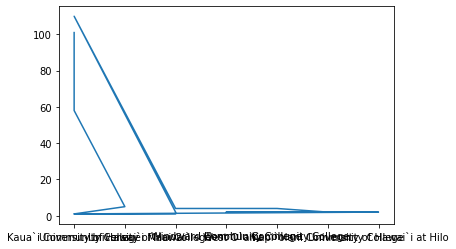

In [32]:
import numpy as np
import matplotlib.pyplot as plt
df_nh=df_cd[df_cd['IRO_INSTITUTION_DESCL'] != 'University of Hawai`i at Manoa']
x = df_nh["IRO_INSTITUTION_DESCL"].tolist()
y = df_nh["ENROLLMENT"].tolist()
x_top=x[:15]
y_top=y[:15]
plt.plot(x_top, y_top)